# Description

TODO

- rename this file to be 27-

# Modules

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from statsmodels.graphics.gofplots import qqplot_2samples
import matplotlib.pyplot as plt
import seaborn as sns

import conf

# Settings

In [2]:
INPUT_DIR = conf.RESULTS["GLS"]
display(INPUT_DIR)

PosixPath('/opt/data/results/gls')

In [3]:
INPUT_FILENAME = INPUT_DIR / "gls-null_simulations.pkl"
display(INPUT_FILENAME)
assert INPUT_FILENAME.exists()

PosixPath('/opt/data/results/gls/gls-null_simulations.pkl')

In [4]:
INPUT_REAL_FILENAME = INPUT_DIR / "gls-null_simulations-real_data.pkl"
display(INPUT_REAL_FILENAME)
assert INPUT_REAL_FILENAME.exists()

PosixPath('/opt/data/results/gls/gls-null_simulations-real_data.pkl')

# Functions

In [5]:
def show_prop(data, frac=0.05):
    _pvalue_lt_frac = data[data["pvalue"] < frac]
    #     display(_pvalue_lt_frac.head())
    display(_pvalue_lt_frac.shape[0] / data.shape[0])

# Null simulations - artificial gene-trait associations

## Load data

In [6]:
results = pd.read_pickle(INPUT_FILENAME)

In [7]:
results.shape

(6270, 4)

In [8]:
results.head()

,phenotype,lv,coef,pvalue
0,random_normal-19,LV629,-0.017303,0.916134
1,random_normal-43,LV828,0.010451,0.200734
2,random_normal-29,LV922,0.018611,0.066561
3,random_normal-5,LV444,0.025777,0.018998
4,random_normal-70,LV210,-0.001532,0.550300


## Proportion pvalue < 0.05

In [9]:
show_prop(results, 0.01)

0.02025518341307815

In [10]:
show_prop(results, 0.05)

0.06523125996810207

In [11]:
show_prop(results, 0.10)

0.11674641148325358

## Plot

In [12]:
data = results["pvalue"].to_numpy()
uniform_data = np.linspace(data.min(), data.max(), num=data.shape[0])

In [13]:
display(data[:5])
display(uniform_data[:5])

array([0.91613363, 0.20073411, 0.06656115, 0.01899791, 0.55030007])

array([4.16868103e-10, 1.59505012e-04, 3.19009607e-04, 4.78514201e-04,
       6.38018796e-04])

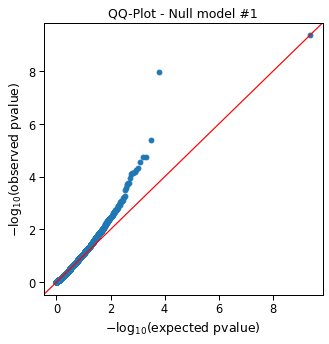

In [14]:
with sns.plotting_context("paper", font_scale=1.3):
    fig, ax = plt.subplots(figsize=(5, 5))

    fig = qqplot_2samples(-np.log10(uniform_data), -np.log10(data), line="45", ax=ax)

    ax.set_xlabel("$-\log_{10}$(expected pvalue)")
    ax.set_ylabel("$-\log_{10}$(observed pvalue)")
    ax.set_title("QQ-Plot - Null model #1")

# Null simulations - real gene-trait associations

## Load data

In [15]:
results = pd.read_pickle(INPUT_REAL_FILENAME)

In [16]:
results.shape

(6270, 4)

In [17]:
results.head()

,phenotype,lv,coef,pvalue
0,supraventricular tachycardia,LV836,0.024826,0.023398
1,soft tissue neoplasm,LV965,-0.008985,0.768745
2,22601_62133370-Job_coding_traveltour_guide,LV725,0.000105,0.496584
3,radius fracture,LV670,-0.014912,0.880191
4,radius fracture,LV922,0.024495,0.023172


## Proportion pvalue < 0.05

In [18]:
show_prop(results, 0.01)

0.021690590111642743

In [19]:
show_prop(results, 0.05)

0.07065390749601276

In [20]:
show_prop(results, 0.10)

0.11945773524720893

## Plot

In [21]:
data = results["pvalue"].to_numpy()
uniform_data = np.linspace(data.min(), data.max(), num=data.shape[0])

In [22]:
display(data[:5])
display(uniform_data[:5])

array([0.02339773, 0.76874472, 0.49658352, 0.88019134, 0.02317226])

array([6.16685020e-07, 1.60131424e-04, 3.19646163e-04, 4.79160902e-04,
       6.38675641e-04])

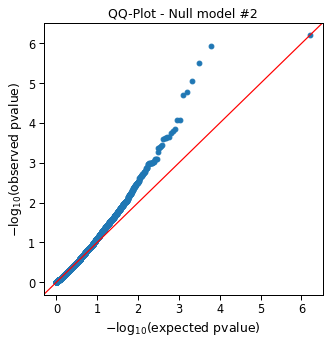

In [23]:
with sns.plotting_context("paper", font_scale=1.3):
    fig, ax = plt.subplots(figsize=(5, 5))

    fig = qqplot_2samples(-np.log10(uniform_data), -np.log10(data), line="45", ax=ax)

    ax.set_xlabel("$-\log_{10}$(expected pvalue)")
    ax.set_ylabel("$-\log_{10}$(observed pvalue)")
    ax.set_title("QQ-Plot - Null model #2")